/Users/yuho.kida/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.


Text(0, 0.5, 'Y')

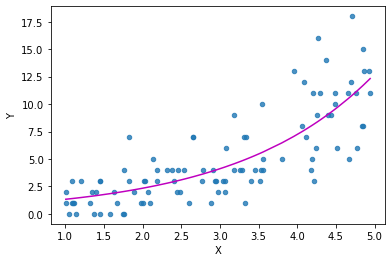

In [1]:
import numpy as np
from numpy.random import uniform, normal, poisson, binomial
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)

exog, endog = sm.add_constant(x), y

import statsmodels.api as sm
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log))
res = mod.fit()

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

In [2]:
import numpy as np
from numpy.random import uniform, normal, poisson, binomial
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

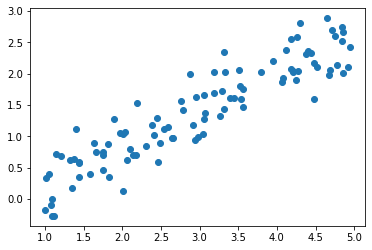

In [3]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.3

x = uniform(1, 5, size=n_sample)
mu = a * x + b
y = normal(mu, sd)

plt.scatter(x, y)

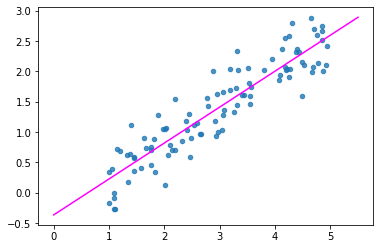

In [4]:
slope, intercept, r_value, p_value, std_err  = stats.linregress(x, y)
xvals = np.array([0, 5.5])
yvals = slope * xvals + intercept

plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(xvals, yvals, color='magenta')
# plt.savefig('linear_regression.png')

(-3.3, 3.3, -0.015256322938149706, 0.41788344676378)

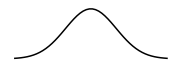

In [5]:
xx = np.linspace(-3,3)

fig, ax = plt.subplots(figsize=(3,1))
ax.plot(xx, stats.norm.pdf(xx), color='k')

# ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
# ax.tick_params(labelleft="off",left="off") # y軸の削除
# ax.set_xticklabels([]) 
# plt.box("off")
ax.axis('off')

# plt.savefig("normal_dist.png", transparent=True)

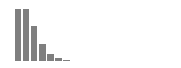

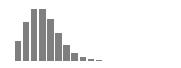

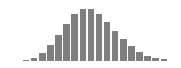

In [6]:
xx = np.arange(1, 20)

for lam in [2, 4, 10]:
    fig, ax = plt.subplots(figsize=(3,1))
    ax.bar(xx, stats.poisson.pmf(xx, mu=lam), color='k', alpha=0.5)

#     ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
#     ax.tick_params(labelleft="off",left="off") # y軸の削除
#     ax.set_xticklabels([]) 
#     plt.box("off")
    ax.axis('off')

#     plt.savefig(f"poisson_dist_lam{lam}.png", transparent=True)

In [7]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)

Text(0, 0.5, 'Y')

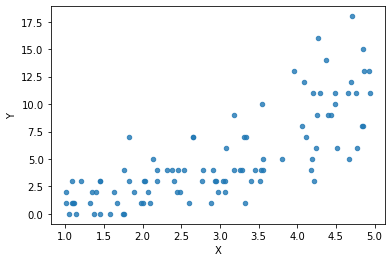

In [8]:
plt.scatter(x, y, s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('poisson_data.png')

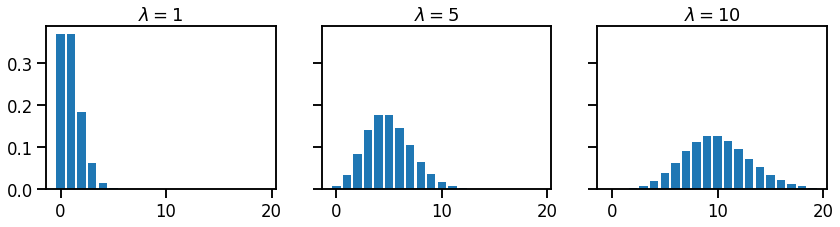

In [9]:
sns.set_context('talk')

fig, axes = plt.subplots(1, 3, figsize=(14, 3), sharey=True)

xx = np.arange(20)
lambdas = [1, 5, 10]

for i, lam in enumerate(lambdas):
    yy = stats.poisson.pmf(xx, lam)
    axes[i].bar(xx, yy)
    axes[i].set_title(r'$\lambda={}$'.format(lam))

# plt.savefig('Poisson_distribution.png')

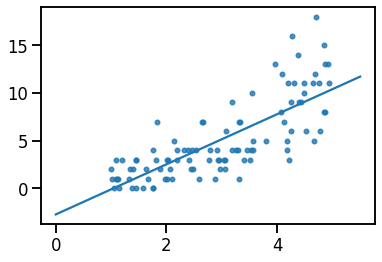

In [10]:
slope, intercept, r_value, p_value, std_err  = stats.linregress(x, y)
xvals = np.array([0, 5.5])
yvals = slope * xvals + intercept

plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(xvals, yvals)

In [11]:
exog = sm.add_constant(x)
endog = y

In [12]:
mod = sm.GLM(endog, exog, family=sm.families.Poisson())
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.95
Date:                Sun, 13 Jun 2021   Deviance:                       120.86
Time:                        22:44:04   Pearson chi2:                     115.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2789      0.162     -1.720      0.085      -0.597       0.039
x1             0.5646      0.042     13.508      0.000       0.483       0.647
==============================================================================
"""

Text(0, 0.5, 'Y')

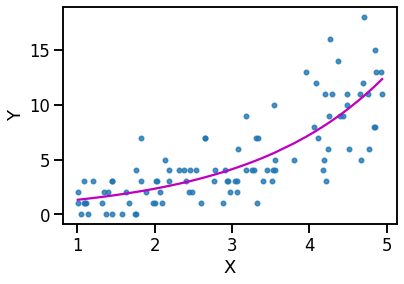

In [14]:
y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('poisson_regression.png')

## Logistic regression

In [15]:
def logistic(x):
    return 1 / (1 + np.exp(-x))


np.random.seed(5)
n_sample = 100
a = 3.0
b = -9.0

x = uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b)
y = binomial(n=1, p=q)

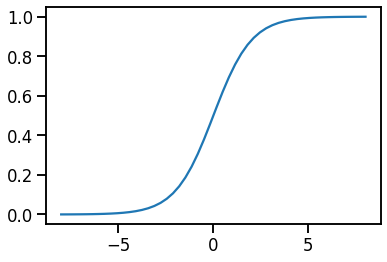

In [16]:
xx = np.linspace(-8, 8)
plt.plot(xx, logistic(xx))

In [17]:
stats.binom(n=1, p=0.8).pmf(1)

0.8

Text(0, 0.5, 'Y')

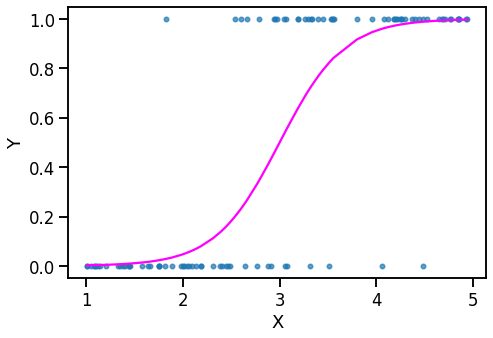

In [18]:
plt.figure(figsize=(7.5, 5))
plt.scatter(x, y,  s=20, alpha=0.7)
plt.plot(x, q, color='magenta')
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('logistic_regression.png')

## custom GLM

xとyは指数関数、誤差は正規分布

In [19]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.8

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = normal(mu, sd)

Text(0, 0.5, 'Y')

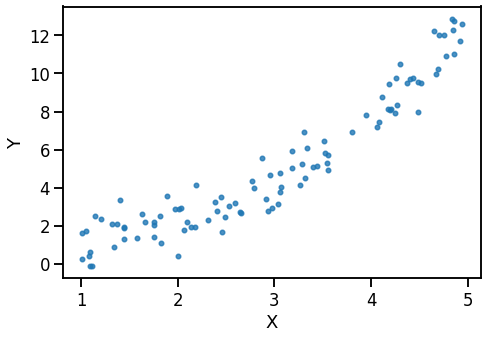

In [20]:
plt.figure(figsize=(7.5, 5))
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('custom_GLM.png')

In [21]:
exog = sm.add_constant(x)
endog = y

mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log))
res = mod.fit()
res.summary()

/Users/yuho.kida/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                         0.69261
Method:                          IRLS   Log-Likelihood:                -122.53
Date:                Sun, 13 Jun 2021   Deviance:                       67.876
Time:                        22:44:24   Pearson chi2:                     67.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3115      0.075     -4.130      0.000      -0.459      -0.164
x1             0.5789      0.018     32.984      0.000       0.545       0.613
==============================================================================
"""

Text(0, 0.5, 'Y')

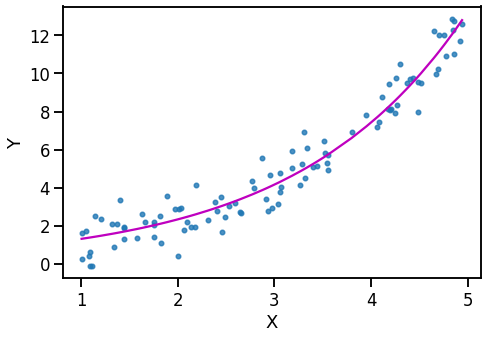

In [22]:
y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.figure(figsize=(7.5, 5))
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

# plt.savefig('custom_GLM_fit.png')

In [23]:
exog = sm.add_constant(x)
endog = y

mod = sm.GLM(endog, exog, family=sm.families.Poisson(sm.families.links.log))
res = mod.fit()
res.summary()

/Users/yuho.kida/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -173.60
Date:                Sun, 13 Jun 2021   Deviance:                       41.759
Time:                        22:44:28   Pearson chi2:                     22.4
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3556      0.164     -2.175      0.030      -0.676      -0.035
x1             0.5899      0.042     14.080      0.000       0.508       0.672
==============================================================================
"""

Text(0, 0.5, 'Y')

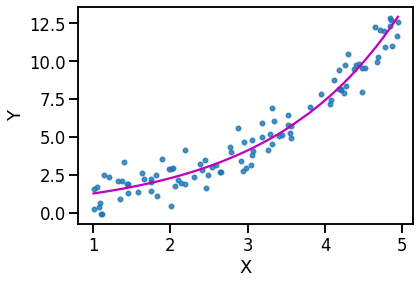

In [24]:
y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

In [25]:
# 負の二項分布回帰
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.8

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)

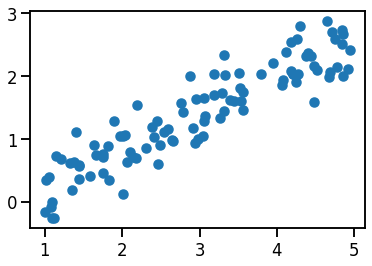

In [26]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.3

x = uniform(1, 5, size=n_sample)
mu = a * x + b
y = normal(mu, sd)

plt.scatter(x, y)